# Project: Wrangling and Analyze Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
from timeit import default_timer as timer

%matplotlib inline

## Data Gathering
In the cell below, we'll gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#importing twitter_archive_enhanced.csv data
tweeter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
#checking if it is correctly imported
tweeter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
response =  requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
#checking if it is correctly imported
image_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#connection to tweepy
api_key = "***"
api_secrets = "***"
access_token = "***"
access_secret = "***"
 
# Authenticate to Twitter
auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_secret)
 
api = tweepy.API(auth, wait_on_rate_limit=True)
 
try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Failed authentication')

Failed authentication


In [7]:
"""
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweeter_archive.tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""


'\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweeter_archive.tweet_id:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

In [8]:
#len(fails_dict)

In [9]:
#importing tweet_json.txt file
#empty list to contain data dict
df_list=[]
with open('tweet_json.txt', encoding='utf-8') as file:
    for tweet_info in file:
        #Converting to dict
        tweet_info = json.loads(tweet_info)
        id = tweet_info['id']
        retweet_count = tweet_info['retweet_count']
        favorite_count = tweet_info['favorite_count']
        # Append to list of dictionaries
        df_list.append({"id":id, 
                        "retweet_count":retweet_count,
                        "favorite_count":favorite_count})
tweet_info = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])


In [10]:
#checking if it is okay
tweet_info.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,6963,33651
1,892177421306343426,5268,29211
2,891815181378084864,3463,21951
3,891689557279858688,7190,36765
4,891327558926688256,7709,35124


## Assessing Data
In this section, we detect and document at least **eight (8) quality issues and two (2) tidiness issue**.


### Assessing tweeter_archive Data


#### Visual assessement


In [11]:
tweeter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
tweeter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,None,None,None
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,None,None,pupper,None
234,847617282490613760,8.476062e+17,4.196984e+09,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@breaannanicolee PUPDATE: Cannon has a heart ...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
103,872486979161796608,NaN,NaN,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,None,None,None
942,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,None,None,None,None
2072,671109016219725825,NaN,NaN,2015-11-29 23:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He asked for chocolate cake for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671109016...,8,10,Toby,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
688,787810552592695296,NaN,NaN,2016-10-17 00:20:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frank. He wears sunglasses and walks h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787810552...,11,10,Frank,None,None,None,None
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,None,None,pupper,None
2133,670073503555706880,NaN,NaN,2015-11-27 02:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He wants to be a power drill. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670073503...,10,10,Winston,None,None,None,None


Visually, we can notice that
* in the source column, there is html code, a tag 
* it misses some dogs names or they are inconsistency names like a, the, an ..
* some dogs don't have a category
* there are four (04) columns for the dogs category (doggo, floofer, pupper, puppo)
* they are useless columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Programmatic assessement


In [13]:
#Checking columns informations
tweeter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We can notice that:
* the timestamp columns must be datetime type
* we observed previously that they are missing data in name column and here we have 2356 non null vales, we should then replace the none values by NaN

In [14]:
# checking numeric values features
tweeter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
tweeter_archive[tweeter_archive['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


**We have a dog with 0 rating denominator**

Let check uniques values of some columns

In [16]:
#verify if we have duplicated tweet id
tweeter_archive.tweet_id.nunique()

2356

In [17]:
#Checking number of denominator that we have
tweeter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**With all those denominators, we can add a new column which will be the rating (numerator/denominator) of the dog**

In [18]:
#Checking dogs names values
tweeter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
Sadie               8
the                 8
an                  7
Buddy               7
Toby                7
Bailey              7
Daisy               7
Bella               6
Koda                6
Stanley             6
Milo                6
Oscar               6
Dave                6
Rusty               6
Leo                 6
Scout               6
Jack                6
Jax                 6
Sunny               5
                 ... 
Charleson           1
Crumpet             1
Emma                1
Rolf                1
Batdog              1
General             1
River               1
Michelangelope      1
Molly               1
Kial                1
Shooter             1
Darby               1
Geno                1
Bode                1
Terrenth  

**So we have 745 dogs without names**

In [19]:
#Checking dogs doggo category values
tweeter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
#Checking dogs floofer category values
tweeter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
#Checking dogs pupper category values
tweeter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
#Checking dogs puppo category values
tweeter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

**With this we are sure that they are only those values to the dogs categories columns**

### Assessing image_prediction Data


#### Visual assessement


In [23]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
879,698549713696649216,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,0.000023,True
1129,728015554473250816,https://pbs.twimg.com/media/ChpuRyvVAAARMoq.jpg,1,cocker_spaniel,0.384559,True,golden_retriever,0.091661,True,sandbar,0.081799,False
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1126,727524757080539137,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,Pomeranian,0.958834,True,Chihuahua,0.024099,True,chow,0.003941,True
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False
274,670833812859932673,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,1,Pekinese,0.609853,True,Persian_cat,0.265442,False,Japanese_spaniel,0.027460,True
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1,llama,0.856789,False,Arabian_camel,0.098727,False,neck_brace,0.016377,False
1526,788765914992902144,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,1,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False
1809,832757312314028032,https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg,2,Cardigan,0.160888,True,Staffordshire_bullterrier,0.159441,True,Boston_bull,0.154368,True
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False


Visually, we can notice that

* the columns names are not descriptives
* it miss somes entries, in the first dataset we have 2356 entries vs 2075 here
* some tweet are not about dog

#### Programmatic assessement


In [25]:
#Checking columns informations
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**There is nothing notice to see at this level**

In [26]:
# checking numeric values features
# The confidence scores (p1_conf, p2_conf et p3_conf) should be between 0 and 1 
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Let check uniques values of some columns

In [27]:
#Checking if we have duplicated tweet id
image_prediction.tweet_id.nunique()

2075

In [28]:
#Checking if we have duplicated images
image_prediction.jpg_url.nunique()

2009

**there are duplicated predictions images**

In [29]:
#Checking the booleans values of p1_dog, p2_dog and p3_dog

print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [30]:
#Checking null prediction of p1, p2 and p3

print(f" P1 {sum(image_prediction.p1.isnull())}")
print(f" P2 {sum(image_prediction.p2.isnull())}")
print(f" P3 {sum(image_prediction.p3.isnull())}")

 P1 0
 P2 0
 P3 0


### Assessing tweet_info Data


#### Visual assessement


In [31]:
tweet_info

,id,retweet_count,favorite_count
0,892420643555336193,6963,33651
1,892177421306343426,5268,29211
2,891815181378084864,3463,21951
3,891689557279858688,7190,36765
4,891327558926688256,7709,35124
5,891087950875897856,2583,17735
6,890971913173991426,1646,10311
7,890729181411237888,15668,56568
8,890609185150312448,3602,24406
9,890240255349198849,6063,27832


In [32]:
tweet_info.sample(10)

,id,retweet_count,favorite_count
468,814530161257443328,1732,8181
803,769212283578875904,1591,5062
654,789599242079838210,1784,6358
1774,676948236477857792,771,1946
1719,679062614270468097,7172,15432
148,862096992088072192,19888,65916
1937,673343217010679808,234,853
2153,668992363537309700,292,657
1732,678675843183484930,1308,2596
415,820690176645140481,2988,11552


Visually, we can notice that

* it miss somes entries, in the first dataset we have 2356 entries vs 2327 here

#### Programmatic assessement


In [33]:
#Checking columns informations
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id                2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [34]:
# checking numeric values features
# The retweet_count and  favorite_count  should be great than 0 
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2456.909755,7019.611517
std,6.820795e+16,4160.262271,10907.863097
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1219.500000
50%,7.178418e+17,1143.000000,3033.000000
75%,7.986547e+17,2844.000000,8555.000000
max,8.924206e+17,70258.000000,144124.000000


Let check uniques values of some columns

In [35]:
#Checking null values
print(sum(tweet_info.retweet_count.isnull()))
print(sum(tweet_info.favorite_count.isnull()))

0
0


**There is nothing notice to see at this level**

### Quality issues

#### tweeter_archive dataset
1. there is some retweets represented by columns retweeted_status_id and replies represented by in_reply_to_status_id and in_reply_to_user_id that we need to clean

2. the source column have html code, a tag 

3. Missing of some dogs names ( represented by None)

4. They are dogs without a category

5. They are useless columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

6. We have a dog with 0 rating denominator

7. we can add a new column which will be the rating (numerator/denominator) of the dog


#### image_prediction dataset
1. the columns names are not descriptives

2. it miss somes records, in the first dataset we have 2356 entries vs 2075 here

3. there are duplicated predictions images

#### tweet_info dataset
1. it miss somes records, in the first dataset we have 2356 entries vs 2327 here


### Tidiness issues

1. Reformating of columns doggo, floofer, pupper, puppo to one categorial column in tweeter_archive

2. We can merge all the datasets to get one

## Cleaning Data
In this section, we clean **all** of the issues you documented while assessing. 

In [36]:
# Make copies of original pieces of data
tweeter_archive_clean = tweeter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_info_clean =  tweet_info.copy()

### Missing data issues

#### Issue #1:  `tweeter_archive`: we have some retweets and replies

 **Define**: Drop replies records (those with non null columns in_reply_to_status_id and in_reply_to_user_id) and retweets records (those with retweeted_status_id non null column)

**Code**

In [37]:
#print number of retweets before cleaning
print(tweeter_archive_clean['retweeted_status_id'].notnull().sum())

# This removes the retweets in the tweeter_archive by removing all rows where retweet_status is not null. 

tweeter_archive_clean = tweeter_archive_clean[tweeter_archive_clean['retweeted_status_id'].isna()]

181


In [38]:
print(sum(tweeter_archive_clean['in_reply_to_status_id'].notnull() | tweeter_archive_clean['in_reply_to_user_id'].notnull()))

78


In [39]:
#print number of retweets before cleaning
print(tweeter_archive_clean['retweeted_status_id'].notnull().sum())

# This removes the replies in the tweeter_archive by removing all rows where in_reply_to_status_id and in_reply_to_user_id are not null. 

tweeter_archive_clean = tweeter_archive_clean[tweeter_archive_clean.in_reply_to_status_id.isna() & tweeter_archive_clean.in_reply_to_user_id.isna()]

0


**Test**

In [40]:
# Below checks the retweets have been effectively removed.

tweeter_archive_clean['retweeted_status_id'].notnull().sum()

0

In [41]:
# Below checks the replies have been effectively removed.

print(sum(tweeter_archive_clean['in_reply_to_status_id'].notnull() | tweeter_archive_clean['in_reply_to_user_id'].notnull()))

0


#### Issue #2:  `tweeter_archive`: Missing of  some dogs names ( represented by None)

 **Define**: Here we can just replace those None values by Nan by using replace function

**Code**

In [42]:
#print number of None names before cleaning
print(sum(tweeter_archive_clean.name == "None"))

603


In [43]:
#replacing None names by np.nan
tweeter_archive_clean.name = tweeter_archive_clean.name.replace("None", np.nan)

**Test**

In [44]:
# Below checks the None names have been effectively replaced.

print(sum(tweeter_archive_clean.name == "None"))

0


#### Issue #3:  `image_prediction`: Missing of somes records, in the first dataset we have 2278 entries vs 2075 here

**Define**: we'll merge  soon all the datasets  based on tweet id 

### Tidiness issues

#### Issue #4:  `tweeter_archive`: Reformating of columns doggo, floofer, pupper, puppo to one categorial column

**Define**: 

* using apply to create the new category column based on conditions
* if all the four columns have None values, category = nan 
* else concat all category separated by | symbol

**Code**

In [45]:
#get category value based on conditions
def create_category_value(tweet):
    columns=['doggo','floofer','pupper','puppo']
    value=""
    for column in columns:
        if(tweet[column] != "None"):
            value += tweet[column]+" "
    if value == "":
        return np.nan
    else:
        return value.strip().replace(' ', '|')


In [46]:
#using apply and calling create_category_value function on each records
tweeter_archive_clean['category'] = tweeter_archive_clean.apply(lambda tweet:
                                                create_category_value(tweet), axis=1)

#deleting the old columns
tweeter_archive_clean = tweeter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

**Test**

In [47]:
#checking new column values
tweeter_archive_clean.category.value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo|pupper       9
doggo|puppo        1
doggo|floofer      1
Name: category, dtype: int64

In [48]:
tweeter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,category
1817,676603393314578432,NaN,NaN,2015-12-15 03:23:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Godzilla pupper. He had a ruff childho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676603393...,9,10,Godzilla,pupper
1599,686034024800862208,NaN,NaN,2016-01-10 03:57:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Your fav crew is back and this time they're em...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686034024...,12,10,NaN,NaN
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344...,4,10,NaN,NaN
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN
158,861005113778896900,NaN,NaN,2017-05-06 23:49:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Burt. He thinks your thesis statement ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861005113...,12,10,Burt,NaN


### Quality issues

#### Issue #5:  `image_prediction`:  the columns names are not descriptives

**Define**: We'll use pandas rename function to correct this problem

**Code**

In [49]:
#showing columns name before renaming
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [50]:
#renaming columns with pandas raname function
image_prediction_clean.rename(columns={"tweet_id":"id",
                                       "jpg_url":"image_url",
                                       "img_num":"image_number",
                                       "p1":"prediction1", 
                                       "p1_conf":"prediction1_score_confiance",
                                      "p1_dog":"is_prediction1_dog",
                                      "p2":"prediction2", 
                                       "p2_conf":"prediction2_score_confiance",
                                      "p2_dog":"is_prediction2_dog",
                                      "p3":"prediction3", 
                                       "p3_conf":"prediction3_score_confiance",
                                      "p3_dog":"is_prediction3_dog"}, inplace = True)

**Test**

In [51]:
#showing columns after cleaning
image_prediction_clean.columns

Index(['id', 'image_url', 'image_number', 'prediction1',
       'prediction1_score_confiance', 'is_prediction1_dog', 'prediction2',
       'prediction2_score_confiance', 'is_prediction2_dog', 'prediction3',
       'prediction3_score_confiance', 'is_prediction3_dog'],
      dtype='object')

#### Issue #6:  `image_prediction`:   We have duplicated predictions images

**Define**: We can't know which url is the original. So i decided to leave this part.

#### Issue #7:  `tweeter_archive`: the source column have a html code, a a tag 

**Define**: split the source column by space to get the href part of the link and split this part by " char

**Code**

In [52]:
#showing source column values before cleaning
tweeter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [53]:
# splitting the source column by " char and getting the 2nd element of the created array
tweeter_archive_clean.source = tweeter_archive_clean.source.apply(lambda x:x.split()[1].split('"')[1])

**Test**

In [54]:
#showing source column values after cleaning

tweeter_archive_clean.source.value_counts()

http://twitter.com/download/iphone              1964
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

#### Issue #8:  `tweeter_archive`: They are dogs without a category

**Define**: We can't do anything here

#### Issue #9:  `tweeter_archive`: They are useless columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)


**Define**: using pandas drop function to drop them

**Code**

In [55]:
#showing  tweeter_archive_clean columns before cleaning
tweeter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'category'],
      dtype='object')

In [56]:
#Drop of columns
tweeter_archive_clean.drop(columns=['in_reply_to_status_id',
                              'in_reply_to_user_id',
                              'retweeted_status_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp'], inplace = True)

**Test**

In [57]:
#showing  tweeter_archive_clean columns after cleaning
tweeter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'category'],
      dtype='object')

#### Issue #10:  `tweeter_archive`: We have a dog with 0 rating denominator

**Define**: We'll delete this record

**Code**

In [58]:
#showing the record with 0 rating_denominator before cleaning
tweeter_archive_clean[tweeter_archive_clean['rating_denominator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,category


In [59]:
#Checking the record which had  rating_denominator 0 in the original dataset
tweeter_archive[tweeter_archive['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


**We can notice that this record was a reply and it is already deleted**

#### Issue #11:  `tweeter_archive`: we can add a new column which will be the rating (numerator/denominator) of the dog

**Define**: adding new column rate by calculating numerator/denominator

**Code**

In [60]:
#creating the new column
tweeter_archive_clean['rate'] = tweeter_archive_clean['rating_numerator'] / tweeter_archive_clean['rating_denominator']

**Test**

In [61]:
#showing columns list after creation
tweeter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'category', 'rate'],
      dtype='object')

In [62]:
#showing some samples after creation
tweeter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,category,rate
2158,669573570759163904,2015-11-25 17:49:14 +0000,http://twitter.com/download/iphone,This is Linda. She just looked up and saw you ...,https://twitter.com/dog_rates/status/669573570...,10,10,Linda,NaN,1.0
990,748705597323898880,2016-07-01 02:31:39 +0000,http://twitter.com,#BarkWeek is getting rather heckin terrifying ...,https://twitter.com/dog_rates/status/748705597...,13,10,NaN,NaN,1.3
1939,673887867907739649,2015-12-07 15:32:42 +0000,http://twitter.com/download/iphone,When you're having a great time sleeping and y...,https://twitter.com/dog_rates/status/673887867...,10,10,NaN,NaN,1.0
1448,696405997980676096,2016-02-07 18:51:43 +0000,http://twitter.com/download/iphone,This is Berb. He just found out that they have...,https://twitter.com/dog_rates/status/696405997...,7,10,Berb,NaN,0.7
977,750011400160841729,2016-07-04 17:00:26 +0000,https://about.twitter.com/products/tweetdeck,Meet Piper. She's an airport doggo. Please ret...,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo,1.1


#### Issue #12: We can merge all the datasets to get one

**Define**:
* Rename the datasets column tweet_id to id
* Merge 
* Reorder all the columns

**Code**

In [63]:
#renaming twee_id to id in tweeter_archive_clean and tweet_info_clean to have the same name than image_prediction_clean 
tweeter_archive_clean.rename(columns = {'tweet_id':"id"}, inplace = True)
tweet_info_clean.rename(columns = {'tweet_id':"id"}, inplace = True)

In [64]:
#showing datasets length before merging
len(tweeter_archive_clean), len(tweet_info_clean), len(image_prediction_clean)

(2097, 2327, 2075)

In [65]:
#merging  tweeter_archive_clean and tweet_info_clean
# We want mainly tweeter_archive_clean informations because of ratings so, we'll merge  based on left join
#firstly  tweeter_archive_clean and tweet_info_clean
df_combined = tweeter_archive_clean.merge(tweet_info_clean, left_on='id', right_on='id', how='inner')

#secondly df_combined and  image_prediction_clean
df_clean = df_combined.merge(image_prediction_clean, left_on='id', right_on='id', how='inner')

In [66]:
#columns before reordering
df_clean.columns

Index(['id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'category', 'rate',
       'retweet_count', 'favorite_count', 'image_url', 'image_number',
       'prediction1', 'prediction1_score_confiance', 'is_prediction1_dog',
       'prediction2', 'prediction2_score_confiance', 'is_prediction2_dog',
       'prediction3', 'prediction3_score_confiance', 'is_prediction3_dog'],
      dtype='object')

In [67]:
# Let reorder columns
df_clean = df_clean[['id', 'timestamp', 'source', 'text', 'expanded_urls','image_url', 'image_number',
       'prediction1', 'prediction1_score_confiance', 'is_prediction1_dog',
       'prediction2', 'prediction2_score_confiance', 'is_prediction2_dog',
       'prediction3', 'prediction3_score_confiance', 'is_prediction3_dog', 'name', 'category', 'retweet_count', 'favorite_count','rating_numerator', 'rating_denominator','rate']]

**Test**

In [68]:
#showing the final dataset columns list after merging
df_clean.columns

Index(['id', 'timestamp', 'source', 'text', 'expanded_urls', 'image_url',
       'image_number', 'prediction1', 'prediction1_score_confiance',
       'is_prediction1_dog', 'prediction2', 'prediction2_score_confiance',
       'is_prediction2_dog', 'prediction3', 'prediction3_score_confiance',
       'is_prediction3_dog', 'name', 'category', 'retweet_count',
       'favorite_count', 'rating_numerator', 'rating_denominator', 'rate'],
      dtype='object')

In [69]:
#showing the final dataset samples after merging
df_clean.sample(5)

,id,timestamp,source,text,expanded_urls,image_url,image_number,prediction1,prediction1_score_confiance,is_prediction1_dog,...,prediction3,prediction3_score_confiance,is_prediction3_dog,name,category,retweet_count,favorite_count,rating_numerator,rating_denominator,rate
335,817423860136083457,2017-01-06 17:33:29 +0000,http://twitter.com/download/iphone,This is Ken. His cheeks are magic. 13/10 (IG: ...,https://twitter.com/dog_rates/status/817423860...,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,...,Eskimo_dog,0.186789,True,Ken,NaN,13517,31705,13,10,1.3
567,773547596996571136,2016-09-07 15:44:53 +0000,http://twitter.com/download/iphone,This is Chelsea. She forgot how to dog. 11/10 ...,https://twitter.com/dog_rates/status/773547596...,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,...,malamute,0.071436,True,Chelsea,pupper,5665,20717,11,10,1.1
938,712717840512598017,2016-03-23 19:09:09 +0000,http://twitter.com/download/iphone,Please don't send in any more polar bears. We ...,https://twitter.com/dog_rates/status/712717840...,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,...,Irish_wolfhound,0.049524,True,NaN,NaN,4496,11291,10,10,1.0
735,747885874273214464,2016-06-28 20:14:22 +0000,http://twitter.com/download/iphone,This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.408450,True,...,pug,0.083018,True,a,NaN,874,2709,8,10,0.8
57,879492040517615616,2017-06-27 00:10:17 +0000,http://twitter.com/download/iphone,This is Bailey. He thinks you should measure e...,https://twitter.com/dog_rates/status/879492040...,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,...,bath_towel,0.073320,False,Bailey,NaN,2617,20612,12,10,1.2


In [70]:
#showing the final dataset length after merging
len(df_clean)

1963

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
df_clean.to_csv('twitter_archive_master.csv',index=None)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
#importing the dataset
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,id,timestamp,source,text,expanded_urls,image_url,image_number,prediction1,prediction1_score_confiance,is_prediction1_dog,...,prediction3,prediction3_score_confiance,is_prediction3_dog,name,category,retweet_count,favorite_count,rating_numerator,rating_denominator,rate
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,...,banana,0.076110,False,Phineas,NaN,6963,33651,13,10,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,...,papillon,0.068957,True,Tilly,NaN,5268,29211,13,10,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,kelpie,0.031379,True,Archie,NaN,3463,21951,12,10,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,...,spatula,0.040836,False,Darla,NaN,7190,36765,13,10,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,...,German_short-haired_pointer,0.175219,True,Franklin,NaN,7709,35124,12,10,1.2


### Insights:
1. which dogs tweet have  the best rating

2. which tweet dogs are more liked by people

3. Which category of dogs is more represented in the dataset

### 1. which tweet dogs  have  the best rating


In [73]:
# let get rating stats
df.rate.describe()


count    1963.000000
mean        1.169375
std         4.098957
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rate, dtype: float64

In [74]:
# we notice previously that the max value of rating is very big
# let see the record of this value to understand the reason
df.query('rate >= 177.600')

,id,timestamp,source,text,expanded_urls,image_url,image_number,prediction1,prediction1_score_confiance,is_prediction1_dog,...,prediction3,prediction3_score_confiance,is_prediction3_dog,name,category,retweet_count,favorite_count,rating_numerator,rating_denominator,rate
715,749981277374128128,2016-07-04 15:00:45 +0000,https://about.twitter.com/products/tweetdeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,...,sunglass,0.050776,False,Atticus,NaN,2268,4764,1776,10,177.6


In [75]:
#let's consider the rating great than que q3 (1.200000) for our fitering
df.query('rate >= @df.rate.quantile(0.75)').sort_values(by=['rate'], ascending=False)

,id,timestamp,source,text,expanded_urls,image_url,image_number,prediction1,prediction1_score_confiance,is_prediction1_dog,...,prediction3,prediction3_score_confiance,is_prediction3_dog,name,category,retweet_count,favorite_count,rating_numerator,rating_denominator,rate
715,749981277374128128,2016-07-04 15:00:45 +0000,https://about.twitter.com/products/tweetdeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,...,sunglass,0.050776,False,Atticus,NaN,2268,4764,1776,10,177.600000
1688,670842764863651840,2015-11-29 05:52:33 +0000,http://twitter.com/download/iphone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,...,drumstick,0.061113,False,NaN,NaN,7549,21984,420,10,42.000000
495,786709082849828864,2016-10-13 23:23:56 +0000,http://twitter.com/download/iphone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,...,chow,0.102654,True,Logan,NaN,5695,17304,75,10,7.500000
378,810984652412424192,2016-12-19 23:06:23 +0000,http://twitter.com/download/iphone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,...,Labrador_retriever,0.025823,True,Sam,NaN,1323,5035,24,7,3.428571
544,778027034220126208,2016-09-20 00:24:34 +0000,http://twitter.com/download/iphone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,...,Lhasa,0.006519,True,Sophie,pupper,1487,6174,27,10,2.700000
1352,680494726643068929,2015-12-25 21:06:00 +0000,http://twitter.com/download/iphone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,...,Great_Pyrenees,0.064061,True,NaN,NaN,438,1567,26,10,2.600000
36,884441805382717440,2017-07-10 15:58:53 +0000,http://twitter.com/download/iphone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.993225,True,...,Chihuahua,0.002081,True,NaN,NaN,4774,23773,14,10,1.400000
540,778408200802557953,2016-09-21 01:39:11 +0000,http://twitter.com/download/iphone,RIP Loki. Thank you for the good times. You wi...,https://twitter.com/dog_rates/status/778408200...,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,...,beagle,0.011942,True,NaN,NaN,3988,12822,14,10,1.400000
64,878057613040115712,2017-06-23 01:10:23 +0000,http://twitter.com/download/iphone,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,French_bulldog,0.839097,True,...,toy_terrier,0.015243,True,Emmy,NaN,5706,36999,14,10,1.400000
162,851464819735769094,2017-04-10 16:00:07 +0000,http://twitter.com/download/iphone,This is Iggy. He was a rescue dog killed in th...,https://twitter.com/dog_rates/status/851464819...,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,...,crossword_puzzle,0.003482,False,Iggy,NaN,6288,22200,14,10,1.400000


So we have 736 best rated dogs tweets

### 2. which tweet dogs are more liked by people


In [76]:
# let get favorite count stats
df.favorite_count.describe()


count      1963.000000
mean       7719.046358
std       11370.874571
min          66.000000
25%        1647.000000
50%        3481.000000
75%        9608.500000
max      144124.000000
Name: favorite_count, dtype: float64

In [77]:
#let's consider the favorite count great than que q3 ( 9608.5) for our fitering
df.query('favorite_count >= @df.favorite_count.quantile(0.75)').sort_values(by=['favorite_count'], ascending=False)

,id,timestamp,source,text,expanded_urls,image_url,image_number,prediction1,prediction1_score_confiance,is_prediction1_dog,...,prediction3,prediction3_score_confiance,is_prediction3_dog,name,category,retweet_count,favorite_count,rating_numerator,rating_denominator,rate
762,744234799360020481,2016-06-18 18:26:18 +0000,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,...,whippet,1.844220e-02,True,NaN,doggo,70258,144124,13,10,1.3
302,822872901745569793,2017-01-21 18:26:02 +0000,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,...,Irish_terrier,6.912620e-02,True,NaN,puppo,39714,123568,13,10,1.3
393,807106840509214720,2016-12-09 06:17:20 +0000,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,...,toy_terrier,7.700810e-02,True,Stephan,NaN,51366,111099,13,10,1.3
107,866450705531457537,2017-05-22 00:28:40 +0000,http://twitter.com/download/iphone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,...,pug,1.770920e-03,True,Jamesy,pupper,30034,108425,13,10,1.3
797,739238157791694849,2016-06-04 23:31:25 +0000,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,...,malamute,8.090120e-02,True,NaN,doggo,52580,106627,13,10,1.3
58,879415818425184262,2017-06-26 19:07:24 +0000,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,...,Cardigan,1.104810e-01,True,Duddles,NaN,37231,92426,13,10,1.3
326,819004803107983360,2017-01-11 02:15:36 +0000,http://twitter.com/download/iphone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,...,Tibetan_terrier,9.475920e-02,True,Bo,doggo,34385,82270,14,10,1.4
133,859196978902773760,2017-05-02 00:04:57 +0000,http://twitter.com/download/iphone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,0.224218,False,...,Persian_cat,1.283830e-01,False,quite,NaN,26153,80094,12,10,1.2
92,870374049280663552,2017-06-01 20:18:38 +0000,http://twitter.com/download/iphone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,...,Labrador_retriever,3.262130e-02,True,Zoey,NaN,22642,73632,13,10,1.3
1401,678399652199309312,2015-12-20 02:20:55 +0000,http://twitter.com/download/iphone,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,swing,0.929196,False,...,Great_Pyrenees,1.403890e-02,True,NaN,NaN,28445,73092,12,10,1.2


We have 491 most liked dogs tweets by people

### 3. Which category of dogs is more represented in the dataset

In [78]:
#gettion number of dog in each category
df.category.value_counts()

pupper           201
doggo             62
puppo             22
doggo|pupper       8
floofer            7
doggo|puppo        1
doggo|floofer      1
Name: category, dtype: int64

So it is pupper dog category which is more represented


### Visualization

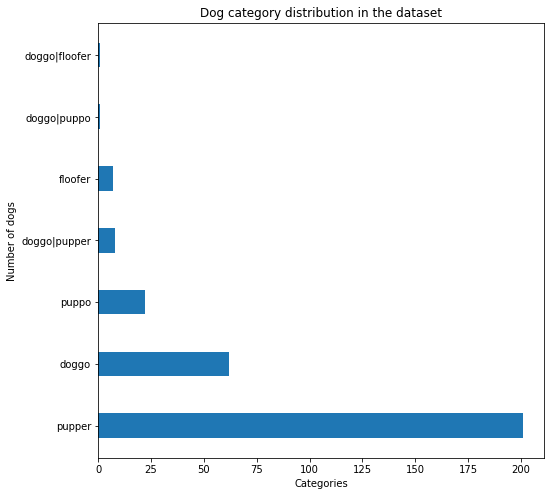

In [79]:
# Let'visualize the dogs representation by category checked previously

plt.figure(figsize=(8,8))
plt.barh([1,3,5,7,9,11,13],df.category.value_counts(),tick_label=df.category.value_counts().index)
plt.title("Dog category distribution in the dataset")
plt.xlabel("Categories")
plt.ylabel("Number of dogs")
plt.show()

So we can see that there is more the pupper dog category than other